### Plasma two-fluid equations

As a next step we investigate the two-fluid equations (also known as two-fluid Euler-Poisson system)
 \begin{align}
     \frac{\partial }{\partial t} n_e&= - \frac{\partial}{\partial x} (u_en_e )  + S_{n} \\
     \frac{\partial }{\partial t} n_i&= - \frac{\partial}{\partial x} (u_in_i )  + S_{n} \\   
    \frac{\partial }{\partial t} n_eu_e&= - \frac{\partial}{\partial x} n_eu_e^2 - \frac{\tau_e}{\mu_e}\frac{\partial}{\partial x} n_e - \frac{1}{\mu_e} n_e\frac{\partial}{\partial x} \phi - \frac{\eta}{\mu_e} n_i (n_i u_i - n_e u_e) + \nu_{u,e}\frac{\partial^2}{\partial x^2} u_e\\
     \frac{\partial }{\partial t} n_iu_i&= - \frac{\partial}{\partial x} n_iu_i^2 - \frac{\tau_i}{\mu_i}\frac{\partial}{\partial x} n_i - \frac{1}{\mu_i}n_i\frac{\partial}{\partial x} \phi - \frac{\eta}{\mu_i} n_i (n_i u_i - n_e u_e) + \nu_{u,i}\frac{\partial^2}{\partial x^2} u_i
 \end{align}
 which is closed by the one-dimensional Poisson equation
 \begin{align}
 -\frac{\partial^2}{\partial x^2} \phi = \frac{n_i - n_e}{\epsilon_D}
 \end{align}
 
 where we have Gyro-Bohm normalization and $\mu_e = -m_e/m_i$, $\mu_i = 1$, $\tau_e = -1$ and $\tau_i = T_i / T_e$. Further, 
 we have $\eta = 0.51 \nu_{ei,0}/ \Omega_{ce}$ and $\nu_{u,e} = 0.73
 \Omega_{ce} / \nu_{ei,0}$ and $\nu_{u,i} = 0.96 \Omega_{ci} / \nu_{ii,0}$. Last, we have the Debye parameter $\epsilon_D = \lambda_D^2 / \rho_s^2$ with the Debye length $\lambda_D$ and the
 ion gyro-radius at electron temperature $\rho_s$. Note that we choose the peculiar signs in $\mu_e$ and $\tau_e$ such that the electron and ion momentum equations have exactly the same form, which makes it easy to implement.
 
 Also note that we choose Bohm normalization based on gyro-radius $\rho_s$ and gyro-frequency $\Omega_{ci}$  because this is how we normalize the three-dimensional model. However, there is no magnetic field in the model and so the gyration does not appear. The more natural normalisation uses plasma frequency and Debye length, which makes the $\epsilon_D$ parameter disappear {cite}`Sack1987`. 
 
 The spatial domain is given by
$[-L_\parallel /2 ; L_\parallel/2]$, where $L_\parallel = 2\pi q R_0$ with $q=3$ and $R_0=0.545$m approximating the length of a fieldline from divertor to divertor in the Compass SOL. We use $N_x$ points.
 
 #### Neutral fluid limit
 We reach the limit of Navier Stokes fluid equations by first setting
 $\mu_e = 0$. Then we find from the electron momentum equation $-\tau_e \partial_x n_e - n_e\partial_x \phi - \eta n_e j = 0$, which
yields the force term $-\tau_i \partial_x n_i + \tau_e \partial_x n_i + \tau_e \epsilon_D \partial_x^3 \phi + \epsilon_D \partial_x (\partial_x \phi)^2 / 2 $ in the ion momentum equation. In the limit $\epsilon_D=0$ the
ion continuity and ion momentum equations thus decouple from the system and yield the Navier Stokes equations.

#### Adiabatic electrons
In the limit of $\mu_e=0$ and vanishing resistivity $\eta =0$
the electron force balance reduces to $\partial_x n_e = n_e \partial_x\phi$ which is solved by $n_e = n_{e,0}\exp(\phi)$. 
 \begin{align}
     \frac{\partial }{\partial t} n_i&= - \frac{\partial}{\partial x} (u_in_i ) + S_{n} \\   
     \frac{\partial }{\partial t} n_iu_i&= - \frac{\partial}{\partial x} n_iu_i^2 - \tau_i\frac{\partial}{\partial x} n_i - n_i\frac{\partial}{\partial x} \phi + \nu_{u,i}\frac{\partial^2}{\partial x^2} u_i
 \end{align}
 which is closed by the one-dimensional non-linear Poisson   equation (choosing $n_{e,0}=1$)
 \begin{align}
 -\frac{\partial^2}{\partial x^2} \phi = \frac{n_i - \exp(\phi)}{\epsilon_D}
 \end{align}

In [168]:
import sys
sys.path.append( '/home/codebind/Dokumenter/GitHub/simplesimdb/' )
# sys.path.append( '/home/codebind/Dokumenter/GitHub/feltorutilities/')
# for p in sys.path:
    # print( p )
import numpy as np
import simplesimdb as simplesim
from netCDF4 import Dataset
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from importlib import reload  
import feltorutilities as fp
fp = reload(fp)

# beder brugeren om et filnavn: 
fileName = input("Enter file name:")
print(fileName)

Enter file name:Gaussian anden hældning
Gaussian anden hældning


In [169]:
# Sætter nogle fysiske parametre  

# These parameters are for a Tokamak
    # liste med værdinavne og bibliotek (Physical) med værdier
#show = ["name", "mu", "R_0", "resistivity", "tau", 
#       "epsilon_D", "viscosity_e", "viscosity_i"]
show = ["name", "mu", "m_i", "R_0", "a_0", "beta", "resistivity", "tau",
        "T_e", "n_0", "B_0", "epsilon_D",
        "omega_0_inv", "viscosity_e", "viscosity_i"]
physical={"name" : "Compass", 
    "beta"   : 1e-4, "resistivity": 1e-4, #change both to change n_0
    "tau"    : 1,                # Relativ temp forskel (Ti/Te)
    "m_i"    : fp.deuteron_mass, # Ionmasse
    "R_0"    : 545,              # Machine radius relativ til Larmor radius (=R/rho_s)
    "R"      : 0.545, #0.545           # Machine radius
    "a"      : 0.175,            #
    "q"      : 2                # Invers aspect ratio (a/R)
#    "Nx"     : 100               # Number of points on the x-axis
#    "scaleR" : 1.45,             #  
#    "Nz"     : 32               # 
         }
# Udregner mu, T_e, T_i,n_0, B_0, og epsilon_D ud fra de indtastede værdier i "physical" og tilføjer til "physical"
fp.numerical2physical( physical, physical)

# Laver bibliotek med show-værdierne ud fra værdierne i "physical"
table = dict()
for s in show :
    table[s] = fp.parameters2quantity( physical, s)  

# Indsætter lx-værdien ud fra R0 værdien i table samt de resterende indsatte værdier fra physical
table["lx"] = 2*np.pi*table["R_0"]*3 # længden af x-aksen
table["m_e"]= -table["mu"]*table["m_i"]
table["R"]  = physical["R"]
table["a"]  = physical["a"]
table["q"]  = physical["q"]
#table["Nx"] = physical["Nx"]
#table["scaleR"] = physical["scaleR"]
#table["Nz"] = physical["Nz"]


# Printer table
for s in [*show, "lx"]:
    print( s, "\t\t", table[s])
print( table["viscosity_i"]/ (2*np.pi*3*table["R_0"])**2  )


# ----- Bestemmer skaleringskonstanter -----
# Henter relevante konstanter
B_0 = table["B_0"]
m_i = table["m_i"]
m_e = table["m_e"]
T_e = table["T_e"]
R   = table["R"]
n_0 = table["n_0"]

# Regner skaleringskonstanter 
n_scale = n_0*1e19                    # Densitetsskalering
rho_s = fp.rho_s( B_0, m_i, T_e)      # Rumskalering  (Larmorradius)
omega_0_inv = fp.omega_0_inv(B_0,m_i) # Tidsskalering (Larmorfrekvens)
c_s = fp.c_s(m_i,T_e)                 # Hastighedsskalering (Ionlydhastighed)
Phi_0 = fp.Phi_0(T_e)                 # Potentialeskalering
Psip_0 = fp.Psip_0(B_0,m_i,T_e, R)    # Magnetisk flux skalering
lambda_D = fp.lambda_D(T_e,n_0)       # Debye længden

# Densiteten, n, er skaleret med n_scale, så denne værdi skal ganges på, for at på fysisk n 

# Indskriver det i en ordbog: 
scaleConstants={
    "n_scale": n_scale,
    "rho_s" : rho_s,
    "omega_0_inv" : omega_0_inv,
    "c_s" : c_s,
    "Phi_0" : Phi_0,
    "Psip_0" : Psip_0,
    "lambda_D" : lambda_D
}


Invert for given R
name 		 Compass
mu 		 -0.00027244371074816386
m_i 		 3.3435837724e-27
R_0 		 545
a_0 		 175.00000001100324
beta 		 0.0001
resistivity 		 0.0001
tau 		 1
T_e 		 7.77608857067851
n_0 		 1.0365292385362574
B_0 		 0.40283899781623667
epsilon_D 		 4.1458919332419e-05
omega_0_inv 		 5.180483659671445e-08
viscosity_e 		 3700.000000592561
viscosity_i 		 113.89049597255578
lx 		 10273.007977238623
1.0791758884448799e-06


In [193]:
# Danner de parametre der er vores plasma input

# The code plasma.cpp discretizes the above equations
    # in space and time with various schemes.
# In the following we document the possible input parameters:
# PARAM: physical: dict with entries: "lx", "mu", "epsilon_D",
    # "viscosity_e", "viscosity_i", "resistivity", "tau"
def make_plasma_input(physical) :
    # Returnerer flere biblioteker af værdier
    return {
    "grid" : 
    {
        # number of grid points
        "Nx" : 1500, #table["Nx"], # (Original=32)
        # definerer x-aksen
        "x" : [-table["lx"]/2, table["lx"]/2],
    },
        # ----- Forskellige startbetingelser -----
#     "init":
#     {
#         # A sine wave in density with 0 velocity
#         "type" : "wave",
#         "amp" : 0.5,
#         "n_0" : 1,
#         "k" : 4*np.pi,
#         "x_0" : 0
#     },
#     "init":
#     {
#         "type" : "step", # a step in density, 0 velocity
#         "x_a" : 0., # location of jump
#         "n_l" : 1,   # density left of jump
#         "n_r" : 0.1, # density right of jump
#     },
#     "init":
#     {
#          # Manufactured solution without shock
#         "type" : "mms",
#         "n_0" : 1,
#         "u_0" : 0.5,
#         "A" : 0.2,
#         "B" : 0.1,
#         "k" : 4*np.pi,
#         "v" : 1
#     },
#    "init":
#    {
#        "type" : "soft-step",
#        "x_a" : 0., # location of jump (in units of lx)
#        "alpha" : 0.1, # transition width (in units of lx) (=0.001 for hard step function) (=0.1 blød stepfunktion)
#        # [x_a - alpha/2, x_a+alpha/2]
#        "n_l" : 1,   # density left of jump
#        "n_r" : 0.01, # density right of jump (Original: 0.2)
#    },
    "init":
    {
        "type" : "normal",
        "Mu" : 0., # Mean value (In units of lx)
        "sigma" : 0.008, # Standard deviation (In units of lx)
        "n_floor" : 0.01, # The minimum initial density (Must not be 0)
        "A" : 1. # Amplitude of the Gaussian function 
        #"normalx" : np.arange(-table["lx"]/2 , table["lx"]/2 , table["lx"]/table["Nx"])   # density left of jump
    },
    "advection" : 
    {
        "type" : "staggered", 
        # centered
        # staggered (allows variant)
        "variant" : "original"
        # original (The original scheme, 1st order)
        # explicit (Take force terms explicitly)
        # slope-limiter (Use 2nd order flux)
        # slope-limiter-explicit (Use 2nd order flux
        #     and force terms explicit)
    },
    "timestepper":
    {
        # The Additive Runge Kutta (ARK) method is a semi-implicit
        # embedded Runge Kutta scheme that works for all (explicit
        # and implicit) advection schemes above
        "type" : "ARK",
        "tableau" : "ARK-4-2-3",
        "rtol" : 1e-6, # relative tolerance (Original 1e-6) (Mindsker fluktueringer - Hold lav)
        "atol" : 1e-7  # absolute tolerance (Original 1e-7)
        # The Embedded Runge Kutta (ERK) only works 
        # for explicit schemes
        # "type" : "ERK", 
        # "tableau" : "Bogacki-Shampine-4-2-3"
    },
    "physical":
    {
        "type" : "original", # plasma two-fluid equations
#         "type" : "adiabatic", # adiabatic electrons 
        # n_e and u_e are 0 in output file
        "nu_u" : [table["viscosity_e"], table["viscosity_i"]],
        # viscosity for [electrons, ions]
        "nu_n" : [0.0, 0.0], 
        # diffusivity for [electron, ions]
        # (can be used to stabilize)
        "resistivity" : table["resistivity"],
        # plasma resistivity eta
        "mu" : table["mu"],
        # negative electron to ion mass ratio
        "tau" : table["tau"],
        # ion to electron temperature ratio
        "epsilon_D" : table["epsilon_D"]
    },
    "constants":
    {
        "epsilon_0" :  8.8542e-12 # [F/m]
    },
    "bc" : # Randbetingelser
    {
         # one of PER, NEU, DIR, DIR_NEU, NEU_DIR
        "density": "NEU",
        "velocity" : "NEU",
        "potential" : "DIR_NEU"
    },
    "poisson":
    {
#         "type" : "anderson", # most general non-linear solver
        "type" : "gmres",
#         "type" : "cg", # if it works it is the fastest method
#         "type" :"bicgstab",
#         # parameters for iterative solvers
        "max_inner" : 30, # 30 is a good number
        "max_outer" : 3, # 3-10
        "l_input" : 3, # 2-4 is a good number
        "mMax" : 10, # 3 - 10 is a good number
        "damping" : 1e-2, # 0.1 to 1e-3 is a good start
        
        "eps" : 1e-12, # accuracy          
    },
    "output":
    {
        # The simulation will run from t = 0 to t = t_end
        "tend" : 0.01, # end time (kort=0.001)
        # Choose a number of (equidistant in time) outputs
        # in output file (excluding first)
        "maxout" : 100
    }
    }

In [194]:
# Deler make_plasma_input op i ikke-adiabatisk og adiabatiske værdier: 

# ----- Ikke-adiabatiske værdier ----- 
params1 = make_plasma_input(table)

#params1["init"]["alpha"] = 0.4
#params1["init"]["n_r"] = 0.01
#params1["grid"]["Nx"]= 400
#params1["timestepper"]["type"] = "ARK"
#params1["timestepper"]["tableau"]  = "ARK-4-2-3"
#params1["timestepper"]["rtol"] = 1e-5
#params1["poisson"]["eps"]= 1e-12
params1["poisson"]["type"] = "bicgstab"
#params1["poisson"]["damping"] = 1e-1

#params1["physical"]["mu"] = -1
#params1["physical"]["nu_u"] = [0.,0.]
params1["physical"]["tau"] = 0.
params1["physical"]["type"] = "original"
#params1["physical"]["resistivity"] = 0.0

params1["advection"] = {"type" : "staggered"}
#params1["output"]["tend"] = 1 #1e-4 to 1e-2
#params1["output"]["maxout"] = 100


# ----- Adiabatiske værdier ----- 
params2 = make_plasma_input(table)

#params2["init"]["alpha"] = 0.001
#params2["init"]["n_r"] = 0.2
params2["grid"]["Nx"]= 200
#params2["timestepper"]["type"] = "ARK"
#params2["timestepper"]["tableau"]  = "ARK-4-2-3"
#params2["timestepper"]["rtol"] = 1e-5
#params2["poisson"]["eps"]= 1e-12
params2["poisson"]["type"] = "anderson"
#params2["poisson"]["damping"] = 1e-1

#params2["physical"]["nu_u"] = [0.,0.]
#params2["physical"]["mu"] = -1
params2["physical"]["tau"] =1.
params2["physical"]["type"] = "adiabatic"
#params2["physical"]["resistivity"] = 0.0

params2["advection"] = {"type" : "staggered"}
#params2["output"]["tend"] = 1e3 #1e-4 to 1e-2
#params2["output"]["maxout"] = 100


# Gemmer alle inputdataen i datafilen: 

String1 = ""
for i in table:
    String1 = String1 + str(i) + "\t\t= " + str(table[i]) + "\n"

String2 = ""
for i in scaleConstants:
    String2 = String2 + str(i) + "\t\t= " + str(scaleConstants[i]) + "\n"

String12 = " ----- Table Values ----- \n \n" + String1 + "\n \n ----- Scale constants ----- \n \n" + String2 + "\n\n"

String3 = ""
for i in params1:
    String3 = String3 + str(i) + "\t\t= " + str(params1[i]) + "\n"

String4 = ""
for i in params2:
    String4 = String4 + str(i) + "\t\t= " + str(params2[i]) + "\n"

String34 = " ----- Plasma input for non-adiabatic simulation ----- \n \n" + String3 + "\n \n ----- Plasma input for adiabatic simulation ----- \n \n" + String4
String = String12 + String34


my_file = open("/media/sf_Linux_VM_shared_folder/Simuleringsdata/Simulation_Data("+fileName+").txt","w+")
#my_file = open("/home/codebind/Bonus Simuleringsdata/Simulation_Data("+fileName+").txt","w+")
my_file.write(String)
my_file.close()


In [195]:
# Vi arbejder her i simplesimdb.py 

# Definerer executable (plasma), inputfil (temp.json)  og outputfil (temp.nc) 
    # (Ændrer temp.nc ud fra inputværdierne ovenover)
rep = simplesim.Repeater("./plasma","temp.json", "temp.nc")
rep.clean()  # Fjerner gammel input- og outputfil 
inputfile = make_plasma_input(table)    # Redefinerer inputfilen ud fra "table"

# Genererer inputfil (temp.json) og kører plasma-simuleringen og gemmer resultaterne som en .nc-fil (temp-nc)
rep.run( inputfile, error="display", stdout="ignore")
ncin = Dataset( "temp.nc", 'r', format="NETCDF4") # Åbner temp.nc-filen, så Python kan læse den. 
var = ncin.variables  # Gemmer dataen fra temp.nc i variablen, "var"

# Printer de fysiske parametre som simuleringen kom frem til:
print( "FILE CONTENTS")
for v in ncin.variables:
    if v == "time" : 
        print(f"{v} {ncin.variables[v].shape}")
    else : 
        print( f"{v} {ncin.variables[v].shape}",
            f"\t{ ncin.variables[v].long_name}")

ncin.close()

b"terminate called after throwing an instance of 'dg::Error'\n  what():  \n    Message from file **/home/codebind/include/dg/backend/blas1_serial.h** in line **29**:\n    CPU Dot failed since one of the inputs contains NaN or Inf\n"
FILE CONTENTS
time (0,)
x (1500,) 	x-coordinate in Computational coordinate system
failed (0,) 	Accumulated Number of failed steps
duration (0,) 	Computation time for the latest output
nsteps (0,) 	Accumulated Number of calls to the timestepper (including failed steps)
electrons (0, 1500) 	Numerical electron density
ions (0, 1500) 	Numerical electron density
ue (0, 1500) 	Numerical electron velocity
ui (0, 1500) 	Numerical ion velocity
potential (0, 1500) 	potential
electrons_ana (0, 1500) 	Analytical solution to the electron density
ions_ana (0, 1500) 	Analytical solution to the ion density
ue_ana (0, 1500) 	Analytical solution to the electron velocity
ui_ana (0, 1500) 	Analytical solution to the ion velocity
potential_ana (0, 1500) 	Analytical solution to

In [196]:
# Simulering for ikke-adiabatiske elektroner (Den nyeste)

rep.clean()
rep.run(params1, error="display", stdout="ignore")
ncin = Dataset( "temp.nc", 'r', format="NETCDF4")
var = ncin.variables

# Henter relevante variable
electrons_nonad = var["electrons"] * n_scale              # Skalerer n_e
chargeDensity_nonad = (var["ions"]*n_scale - electrons_nonad) * 1.602e-19     # Skalerer ladningsdensiteten
electronVel_nonad = var["ue"] * c_s                    # Skalerer elektron hastigheden
ionVel_nonad = var["ui"] * c_s                         # Skalerer ion hastigheden
potential_nonad = var["potential"] * Phi_0  


# Redefinerer relevante variable:
time1 = var["time"][:] * omega_0_inv # Skalerer tiden
x1 = var["x"][:] * rho_s # Skalerer x
last_idx  = time1.shape[0]-1
Nx1 = params1['grid']['Nx']


# Danner vektorer der skal plottes: 
electrons1 = var["electrons"][last_idx,:] * n_scale              # Skalerer n_e
chargeDensity1 = (var["ions"][last_idx,:]*n_scale -electrons1) * 1.602e-19     # Skalerer ladningsdensiteten
electronVel1 = var["ue"][last_idx,:] * c_s                    # Skalerer elektron hastigheden
ionVel1 = var["ui"][last_idx,:] * c_s                         # Skalerer ion hastigheden
potential1 = var["potential"][last_idx,:] * Phi_0             # Skalerer potentialet
electricField1 = -np.gradient( potential1, x1)                  # Uskaleret elektrisk felt

ncin.close()

<IPython.core.display.Javascript object>


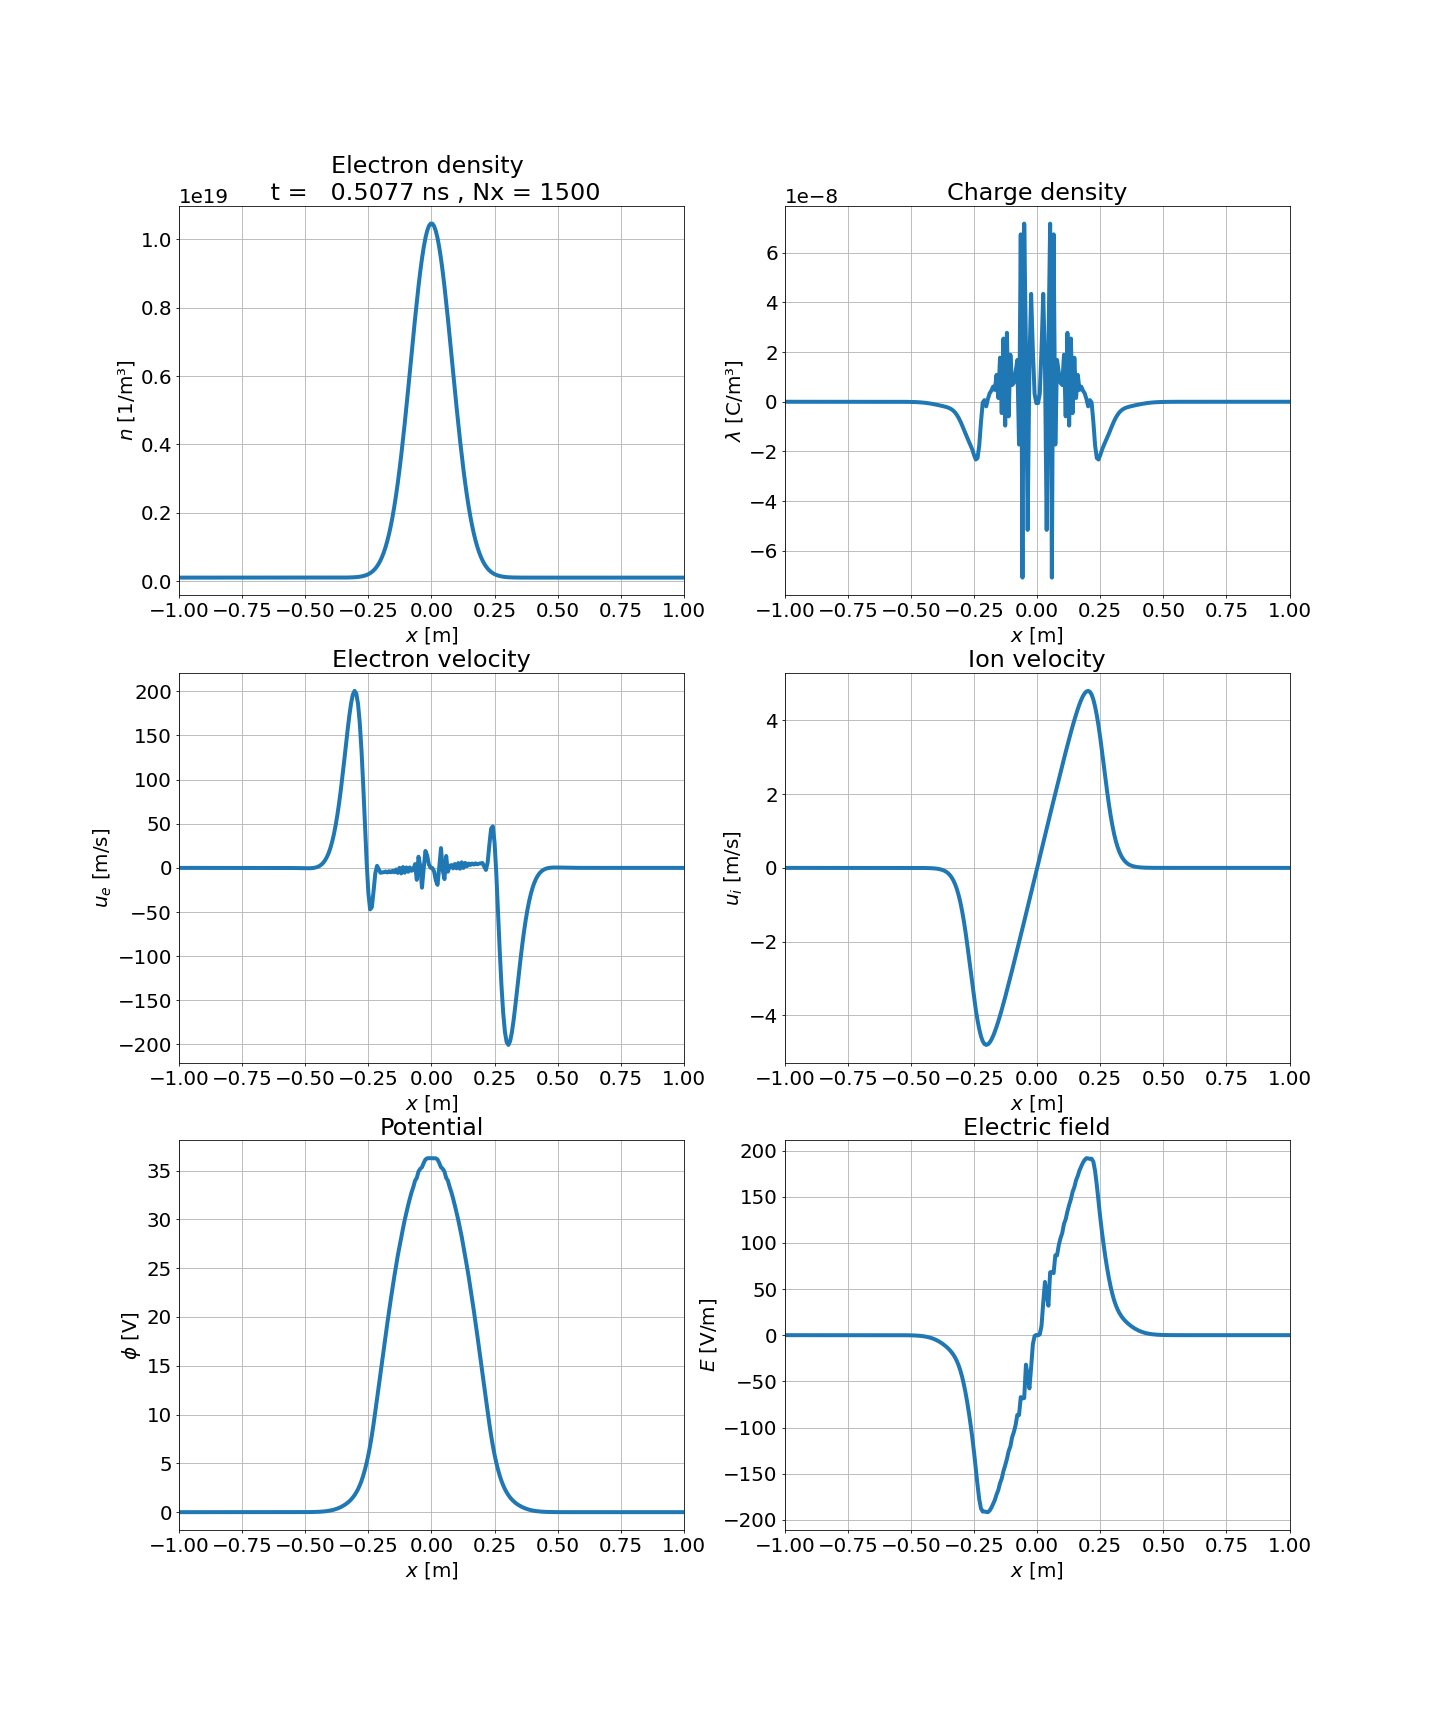

In [204]:
# Plotter ikke-adiabatisk simulering

# Hvis man vil kan man loade gemt data fra en færdig simulering: 
#fileName = "Generel smooth step 3"
loadFile = ""
#loadFile = "Generel smooth step"
if loadFile != "":
    Arrays = np.load("/media/sf_Linux_VM_shared_folder/Simuleringsdata/Data til generel forklaring/Arrays(" + loadFile + ").npz")
    print("----- Loading external data -----")
    
    x1 = Arrays["x1"]
    time1 = Arrays["time1"]
    electrons1 = Arrays["electrons1"]
    chargeDensity1 = Arrays["chargeDensity1"]
    electronVel1 = Arrays["electronVel1"]
    ionVel1 = Arrays["ionVel1"]
    potential1 = Arrays["potential1"]
    electricField1 = Arrays["electricField1"]
    Nx1 = Arrays["Nx1"]

    
    
# ----- Plotter ikke-adiabatisk simulering ----- 
plt.rcParams.update({'font.size': 20})
frows = 3
fcols = 2

fig,ax=plt.subplots(frows,fcols,figsize=(fcols*10,frows*8),dpi= 80, facecolor='w', edgecolor='k')

im = ax[0][0].plot( x1, electrons1, label=1, lw=4)
im = ax[0][1].plot( x1, chargeDensity1, label=2, lw=4)
im = ax[1][0].plot( x1, electronVel1, lw=4)
im = ax[1][1].plot( x1, ionVel1, lw=4)
im = ax[2][0].plot( x1, potential1, lw=4)
im = ax[2][1].plot( x1, electricField1, lw=4)

ax[0][0].set_title( f"Electron density \n t = {1e9 * time1[-1-2]:8.4f} ns , Nx = {Nx1}")
ax[0][0].set_xlabel( r"$x$ [m]")
ax[0][0].set_ylabel("$n$ [1/m³]")
ax[0][0].set_xlim(-1,1)
ax[0][0].grid()

ax[0][1].set_title( f"Charge density")
ax[0][1].set_xlabel( r"$x$ [m]")
ax[0][1].set_ylabel("$\lambda$ [C/m³]")
ax[0][1].set_xlim(-1,1)
ax[0][1].grid()

ax[1][0].set_title( f"Electron velocity")
ax[1][0].set_xlabel( r"$x$ [m]")
ax[1][0].set_ylabel( r"$u_e$ [m/s]")
ax[1][0].set_xlim(-1,1)
ax[1][0].grid()

ax[1][1].set_title( f"Ion velocity")
ax[1][1].set_xlabel( r"$x$ [m]")
ax[1][1].set_ylabel( r"$u_i$ [m/s]") 
ax[1][1].set_xlim(-1,1)
ax[1][1].grid()

ax[2][0].set_title( f"Potential")
ax[2][0].set_xlabel( r"$x$ [m]")
ax[2][0].set_ylabel( r"$\phi$ [V]")
ax[2][0].set_xlim(-1,1)
ax[2][0].grid()

ax[2][1].set_title( f"Electric field")
ax[2][1].set_xlabel( r"$x$ [m]")
ax[2][1].set_ylabel( r"$E$ [V/m]")  
ax[2][1].set_xlim(-1,1)
ax[2][1].grid()

plt.savefig('/media/sf_Linux_VM_shared_folder/Simuleringsdata/Non_adiabatic('+fileName+').png')
#plt.savefig('/home/codebind/Bonus Simuleringsdata/Non_adiabatic('+fileName+').png')

In [198]:
# Simulering for adiabatiske elektroner

rep.clean()
rep.run(params2, error="display", stdout="ignore")
ncin = Dataset( "temp.nc", 'r', format="NETCDF4")
var = ncin.variables

# Henter relevante variable
electrons_ad = np.exp( var["potential"]) * n_scale              # Skalerer n_e
chargeDensity_ad = (var["ions"]*n_scale - electrons_ad) * 1.602e-19     # Skalerer ladningsdensiteten
electronVel_ad = var["ue"] * c_s                    # Skalerer elektron hastigheden
ionVel_ad = var["ui"] * c_s                         # Skalerer ion hastigheden
potential_ad = var["potential"] * Phi_0  


# Redefinerer relevante variable:
time2 = var["time"][:] * omega_0_inv    # Skalerer tiden
x2 = var["x"][:] * rho_s                # Skalerer x
last_idx  = time2.shape[0]-1
Nx2 = params2['grid']['Nx']

print(len(time2))
print(last_idx)
print(len(np.exp( var["potential"][:,0])))

# Danner vektorer der skal plottes: 
electrons2 = np.exp( var["potential"][last_idx ,:])* n_scale     # Skalerer n_e
ions2 = var["ions"][last_idx,:]*n_scale                          # Skalerer n_i
chargeDensity2 = (var["ions"][last_idx,:]*n_scale -electrons2) * 1.602e-19     # Skalerer ladningsdensiteten
#if params1["init"]["type"] == "normal":                       # Fjerner wierd værdi i Gaussisk plot
#    chargeDensity2[0] = chargeDensity2[-1]
electronVel2 = var["ue"][last_idx,:] * c_s                    # Skalerer elektron hastigheden
ionVel2 = var["ui"][last_idx,:] * c_s                         # Skalerer ion hastigheden
potential2 = var["potential"][last_idx,:] * Phi_0             # Skalerer potentialet
electricField2 = -np.gradient( potential2, x2)                  # Uskaleret elektrisk felt

if params2["init"]["type"] == "normal": 
    chargeDensity2[0] = 0

# Ion sound speed: 
ion_ss = np.sqrt(table["tau"]+1) * c_s # Skaleret ion_ss

ionVel2time = var["ui"][:,:]

ncin.close()

101
100
101


<IPython.core.display.Javascript object>


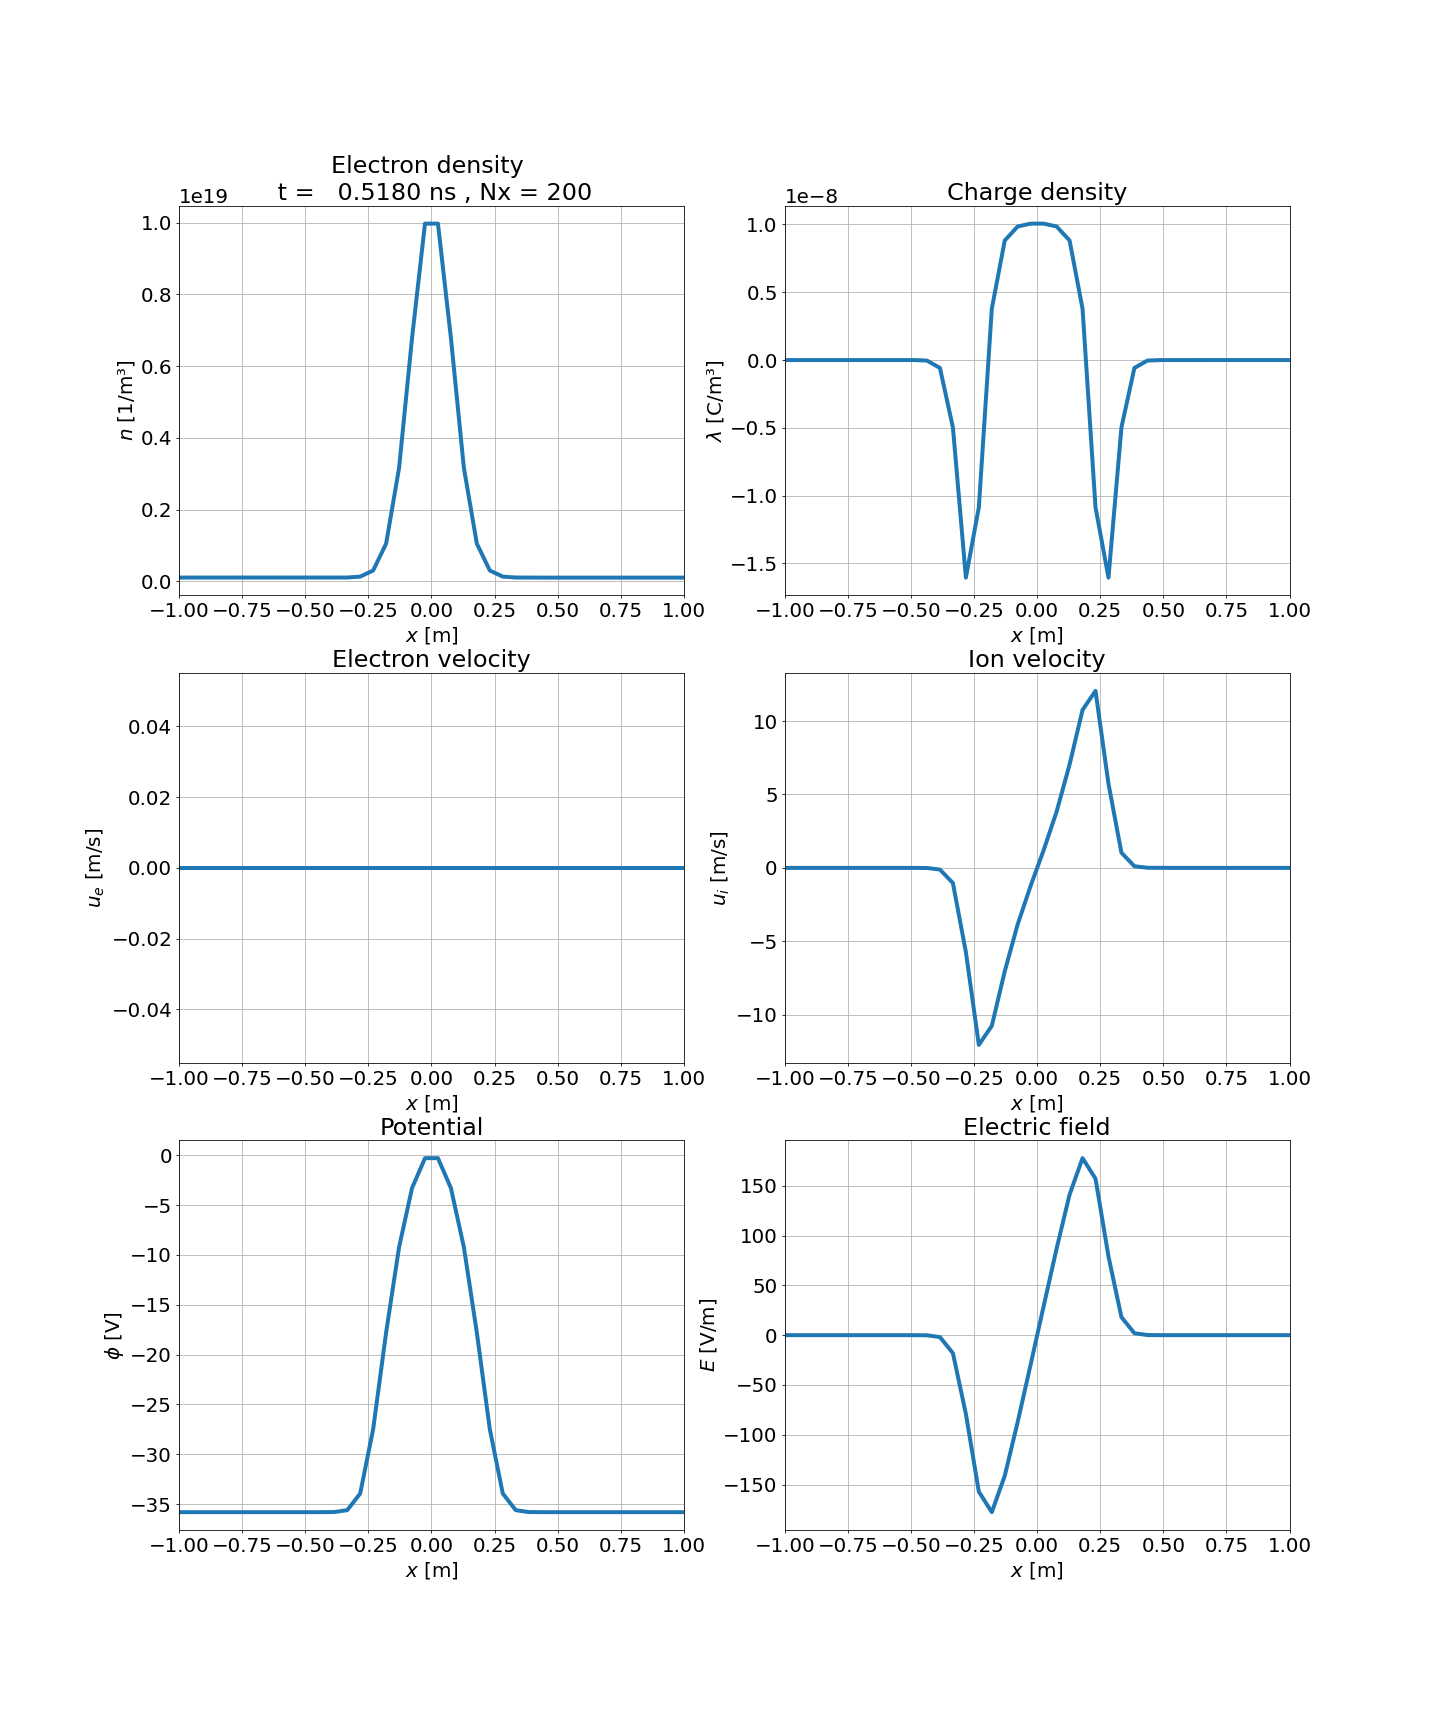

In [203]:
# Plotter adiabatisk simulering

# Hvis man vil kan man loade gemt data fra en færdig simulering: 
loadFile = ""
#loadFile = "Dam break tend=1e3"
if loadFile != "":
    Arrays = np.load("/media/sf_Linux_VM_shared_folder/Simuleringsdata/Lange simuleringer/Smooth/Dam break/PlotArrays(" + loadFile + ").npz")
    print("----- Loading external data -----")
    
    x2 = Arrays["x2"]
    time2 = Arrays["time2"]
    electrons2 = Arrays["electrons2"]
    chargeDensity2 = Arrays["chargeDensity2"]
    electronVel2 = Arrays["electronVel2"]
    ionVel2 = Arrays["ionVel2"]
    potential2 = Arrays["potential2"]
    electricField2 = Arrays["electricField2"]
    Nx2 = Arrays["Nx2"]
    
# ----- Plotter adiabatisk simulering----- 
plt.rcParams.update({'font.size': 20})
frows = 3
fcols = 2

fig,ax=plt.subplots(frows,fcols,figsize=(fcols*10,frows*8),dpi= 80, facecolor='w', edgecolor='k')

im = ax[0][0].plot( x2, ions2, label=1, lw=4)
#im = ax[0][0].plot( x2, electrons2, label=1, lw=4)
im = ax[0][1].plot( x2, chargeDensity2, label=2, lw=4)
im = ax[1][0].plot( x2, electronVel2, lw=4)
im = ax[1][1].plot( x2, ionVel2, lw=4)
im = ax[2][0].plot( x2, potential2, lw=4)
im = ax[2][1].plot( x2, electricField2, lw=4)



# Scale x-axis
xaxis = 1
if xaxis != 0:        
    ax[0][0].set_xlim(-xaxis,xaxis)
    ax[0][1].set_xlim(-xaxis,xaxis)
    ax[1][0].set_xlim(-xaxis,xaxis)
    ax[1][1].set_xlim(-xaxis,xaxis)
    ax[2][0].set_xlim(-xaxis,xaxis)
    ax[2][1].set_xlim(-xaxis,xaxis)

    
#ax[0][0].set_title( f"Ion density \n t = {1e6 * time2[-1]:8.4f} $\mu$s , Nx = {Nx2}")
ax[0][0].set_title( f"Electron density \n t = {1e9 * time2[-1]:8.4f} ns , Nx = {Nx2}")
#ax[0][0].set_title( f"Electron density \n t = {1e6 * time2[-1]:8.4f} $\mu$s , Nx = {Nx2}")
ax[0][0].set_xlabel( r"$x$ [m]")
ax[0][0].set_ylabel("$n$ [1/m³]")
ax[0][0].grid()

ax[0][1].set_title( f"Charge density")
ax[0][1].set_xlabel( r"$x$ [m]")
ax[0][1].set_ylabel("$\lambda$ [C/m³]")
ax[0][1].grid()

ax[1][0].set_title( f"Electron velocity")
ax[1][0].set_xlabel( r"$x$ [m]")
ax[1][0].set_ylabel( r"$u_e$ [m/s]")
ax[1][0].grid()

ax[1][1].set_title( f"Ion velocity")
ax[1][1].set_xlabel( r"$x$ [m]")
ax[1][1].set_ylabel( r"$u_i$ [m/s]")   
#ax[1][1].axhline(y = ion_ss,  color = "red", linestyle = 'solid')
ax[1][1].grid()

ax[2][0].set_title( f"Potential")
ax[2][0].set_xlabel( r"$x$ [m]")
ax[2][0].set_ylabel( r"$\phi$ [V]")
ax[2][0].grid()

ax[2][1].set_title( f"Electric field")
ax[2][1].set_xlabel( r"$x$ [m]")
ax[2][1].set_ylabel( r"$E$ [V/m]")  
ax[2][1].grid()

plt.savefig('/media/sf_Linux_VM_shared_folder/Simuleringsdata/Adiabatic('+fileName+').png')
#plt.savefig('/home/codebind/Bonus Simuleringsdata/Adiabatic('+fileName+').png')

<IPython.core.display.Javascript object>


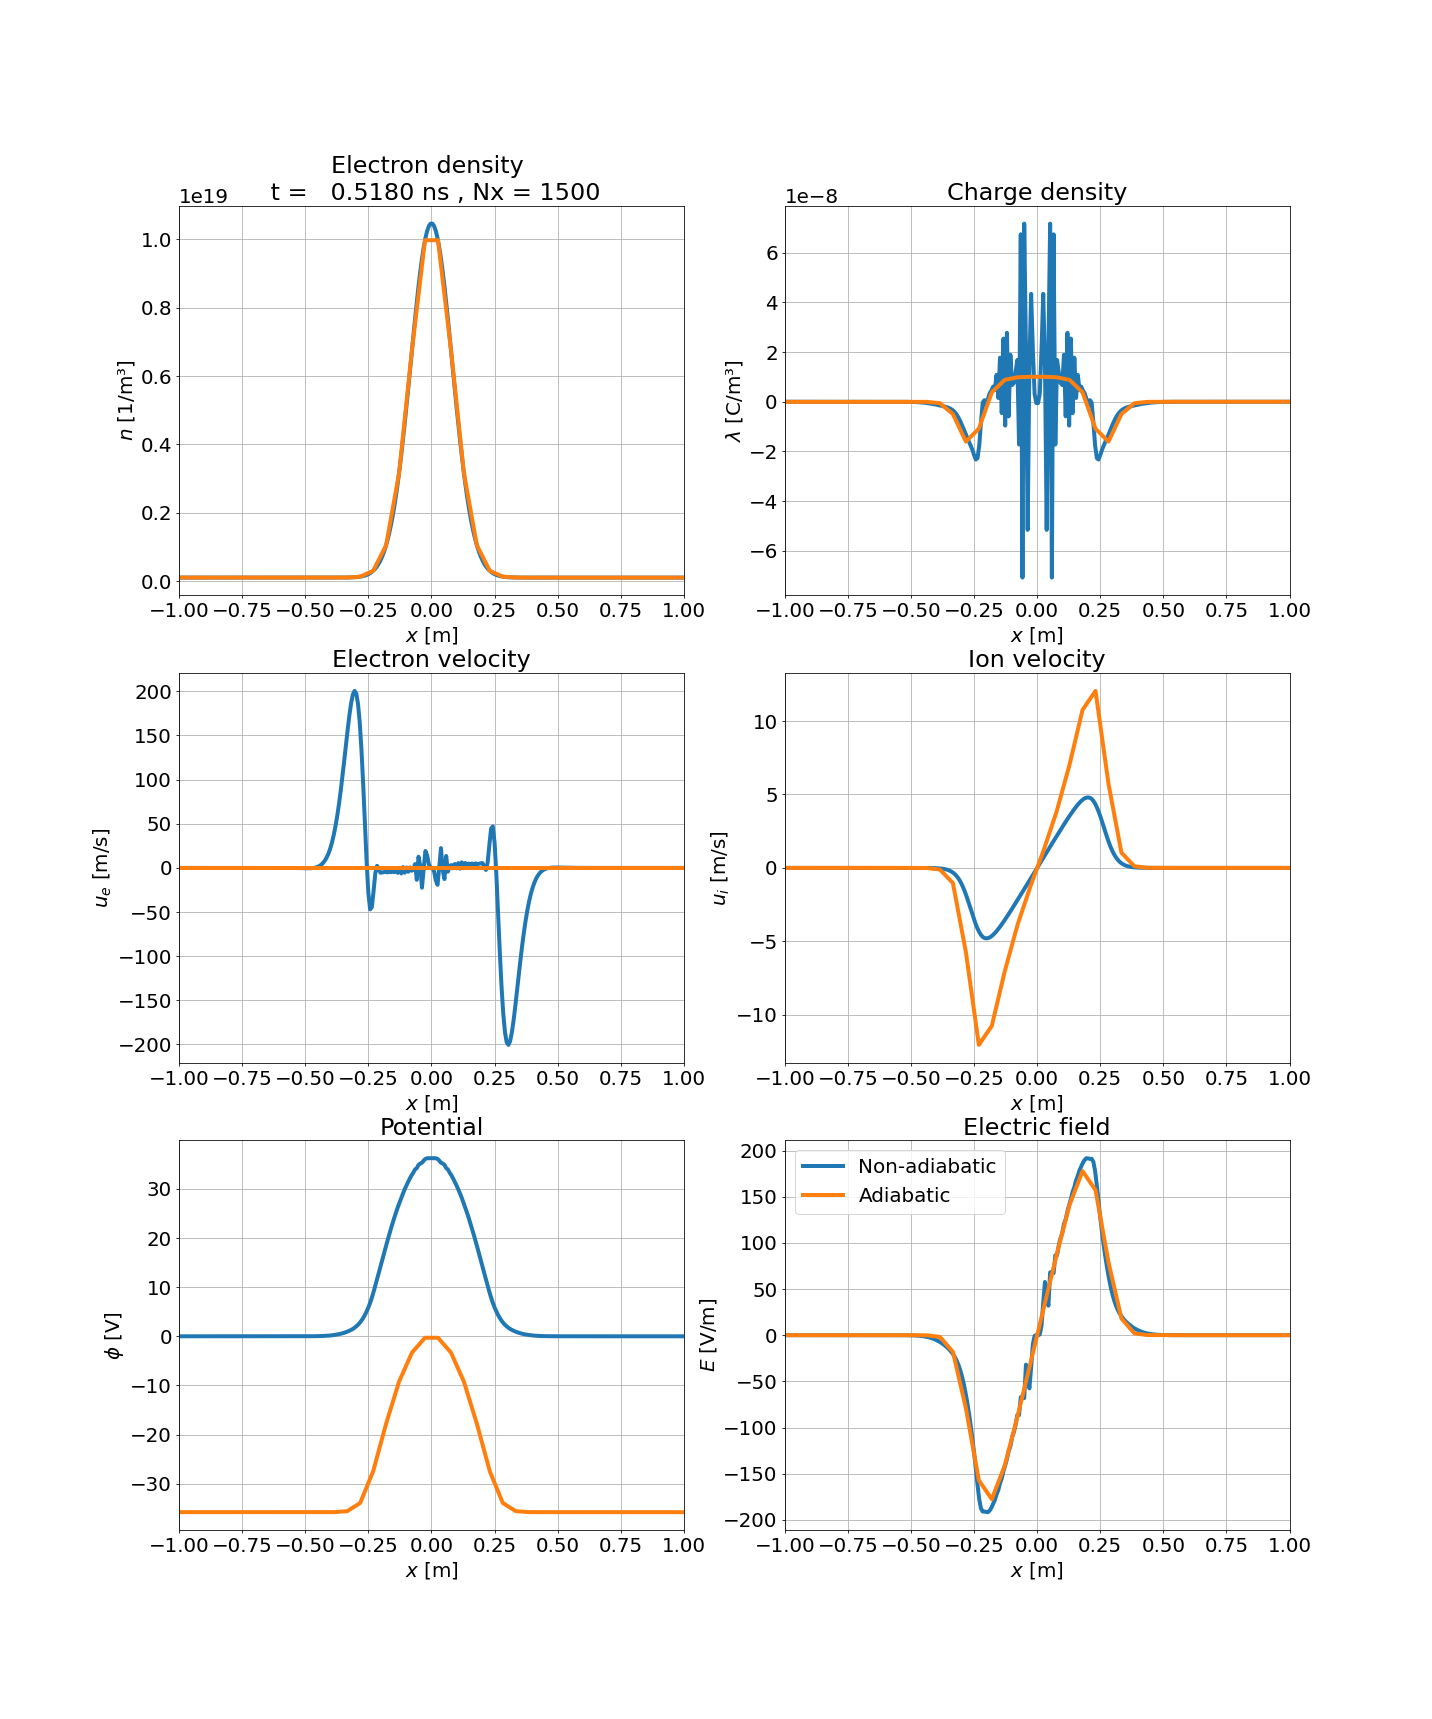

In [200]:
# Plotter adiabatisk og ikke adiabatisk oven i hinanden: 
# Hvis man vil kan man loade gemt data fra en færdig simulering: 
loadFile = ""
l#oadFile = "tend=1 , Nx=500,200 Ny tid 2 - Rigtig"
if loadFile != "":
    PlotArrays = np.load("/media/sf_Linux_VM_shared_folder/Simuleringsdata/Lange simuleringer/Smooth/PlotArrays(" + loadFile + ").npz")
    print("----- Loading external data -----")
    
    x1 = PlotArrays["x1"]
    time1 = PlotArrays["time1"]
    Nx1 = PlotArrays["Nx1"]
    last_idx = time1.shape[0]-1
    
    electrons1 = PlotArrays["electrons_nonad"][last_idx ,:]
    chargeDensity1 = PlotArrays["chargeDensity_nonad"][last_idx ,:]
    electronVel1 = PlotArrays["electronVel_nonad"][last_idx ,:]
    ionVel1 = PlotArrays["ionVel_nonad"][last_idx ,:]
    potential1 = PlotArrays["potential_nonad"][last_idx ,:]
    electricField1 = -np.gradient( potential1, x1)
    
    x2 = PlotArrays["x2"]
    time2 = PlotArrays["time2"]
    Nx2 = PlotArrays["Nx2"]
    
    electrons2 = PlotArrays["electrons_ad"][last_idx ,:]
    chargeDensity2 = PlotArrays["chargeDensity_ad"][last_idx ,:]
    electronVel2 = PlotArrays["electronVel_ad"][last_idx ,:]
    ionVel2 = PlotArrays["ionVel_ad"][last_idx ,:]
    potential2 = PlotArrays["potential_ad"][last_idx ,:]
    electricField2 = -np.gradient( potential2, x2)
    
    

if params1["output"]["tend"] == params2["output"]["tend"]: 
    
    frows = 3
    fcols = 2
    fig,ax=plt.subplots(frows,fcols,figsize=(fcols*10,frows*8),dpi= 80, facecolor='w', edgecolor='k')
    
    im = ax[0][0].plot( x1, electrons1, label=1, lw=4)
    im = ax[0][1].plot( x1, chargeDensity1, label=2, lw=4)
    im = ax[1][0].plot( x1, electronVel1, lw=4)
    im = ax[1][1].plot( x1, ionVel1, lw=4)
    im = ax[2][0].plot( x1, potential1, lw=4)
    im = ax[2][1].plot( x1, electricField1, lw=4,label='Non-adiabatic')
    
    im = ax[0][0].plot( x2, electrons2, label=1, lw=4)
    im = ax[0][1].plot( x2, chargeDensity2, label=2, lw=4)
    im = ax[1][0].plot( x2, electronVel2, lw=4)
    im = ax[1][1].plot( x2, ionVel2, lw=4)
    im = ax[2][0].plot( x2, potential2, lw=4)
    im = ax[2][1].plot( x2, electricField2, lw=4, label='Adiabatic')

    ax[0][0].set_title( f"Electron density \n t = {1e9 * time1[last_idx]:8.4f} ns , Nx = {Nx1}")
    ax[0][0].set_xlabel( r"$x$ [m]")
    ax[0][0].set_ylabel("$n$ [1/m³]")
    ax[0][0].set_xlim(-1,1)
    ax[0][0].grid()

    ax[0][1].set_title( f"Charge density")
    ax[0][1].set_xlabel( r"$x$ [m]")
    ax[0][1].set_ylabel("$\lambda$ [C/m³]")
    ax[0][1].set_xlim(-1,1)
    ax[0][1].grid()

    ax[1][0].set_title( f"Electron velocity")
    ax[1][0].set_xlabel( r"$x$ [m]")
    ax[1][0].set_ylabel( r"$u_e$ [m/s]")
    ax[1][0].set_xlim(-1,1)
    ax[1][0].grid()

    ax[1][1].set_title( f"Ion velocity")
    ax[1][1].set_xlabel( r"$x$ [m]")
    ax[1][1].set_ylabel( r"$u_i$ [m/s]") 
    ax[1][1].set_xlim(-1,1)
    ax[1][1].grid()

    ax[2][0].set_title( f"Potential")
    ax[2][0].set_xlabel( r"$x$ [m]")
    ax[2][0].set_ylabel( r"$\phi$ [V]")
    ax[2][0].set_xlim(-1,1)
    ax[2][0].grid()

    ax[2][1].set_title( f"Electric field")
    ax[2][1].set_xlabel( r"$x$ [m]")
    ax[2][1].set_ylabel( r"$E$ [V/m]")  
    ax[2][1].set_xlim(-1,1)
    ax[2][1].grid()
    ax[2][1].legend()
    
    plt.savefig('/media/sf_Linux_VM_shared_folder/Simuleringsdata/Combined_Plot('+fileName+').png')
#plt.savefig('/home/codebind/Bonus Simuleringsdata/Adiabatic('+fileName+').png')




<IPython.core.display.Javascript object>


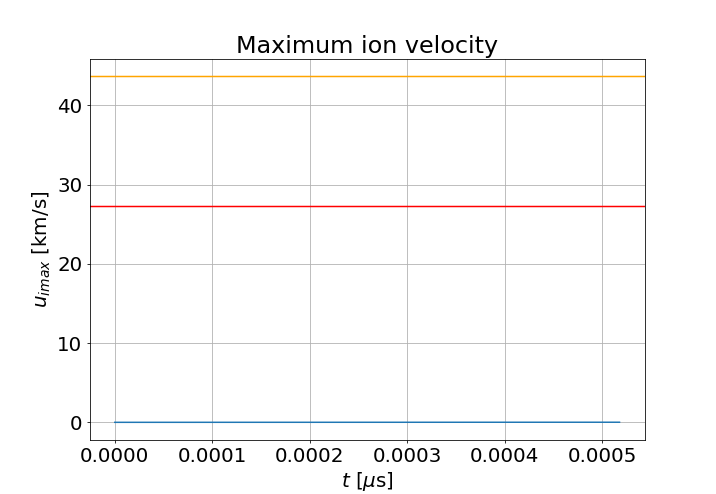

3
 5


In [201]:
# Plotter max ionhastigheden som funktion af tiden: 

# Bestemmer max-værdierne: 
ionVel2time0 = np.max(ionVel2time,1) * c_s                         # Skalerer ion hastigheden
# ion_sstheory = 


# Plotter: 
fig,ax=plt.subplots(1,1,figsize=(5*fcols,2.3*frows),dpi= 80, facecolor='w', edgecolor='k')

ax.plot(time2*1e6,ionVel2time0/1000)
ax.set_title( f"Maximum ion velocity")
ax.set_xlabel( r"$t$ [$\mu$s]")
ax.set_ylabel( r"$u_{imax}$ [km/s]") 
ax.grid()
ax.axhline(y = ion_ss/1000,  color = "red", linestyle = 'solid')
ax.axhline(y = ion_ss/1000*1.6,  color = "orange", linestyle = 'solid')
print("3\n 5")

plt.savefig('/media/sf_Linux_VM_shared_folder/Simuleringsdata/IonSoundSpeed('+fileName+').png')


In [202]:
### Gemmer plot arrays
np.savez("/media/sf_Linux_VM_shared_folder/Simuleringsdata/PlotArrays(" + fileName + ").npz" , 
    electrons_nonad=electrons_nonad, chargeDensity_nonad=chargeDensity_nonad, electronVel_nonad=electronVel_nonad, ionVel_nonad=ionVel_nonad, potential_nonad=potential_nonad,
    electrons_ad=electrons_ad, chargeDensity_ad=chargeDensity_ad, electronVel_ad=electronVel_ad, ionVel_ad=ionVel_ad, potential_ad=potential_ad,
    electrons1=electrons1, chargeDensity1=chargeDensity1, electronVel1=electronVel1,ionVel1=ionVel1, potential1=potential1, electricField1=electricField1, x1=x1, time1=time1, Nx1 = Nx1,
    electrons2=electrons2, chargeDensity2=chargeDensity2, electronVel2=electronVel2,ionVel2=ionVel2, potential2=potential2, electricField2=electricField2, x2=x2, time2=time2, Nx2 = Nx2)



In [192]:
# The mms method is to check that all terms are implemented correctly
p_list = []
for p in [
    {"type" : "staggered", "variant" : "original"},
    {"type" : "staggered", "variant" : "slope-limiter"},
    {"type" : "staggered", "variant" : "slope-limiter-explicit"},
    {"type" : "centered"},
         ] :
    for Nx in [100,200,400]:#,800,1600,3200]:
            # Her kan vi igen ændre parametetrværdierne som vil bruges i denne simulering
        params = make_plasma_input(table)
        params["grid"]["Nx"]= Nx
        params["grid"]["x"] = [0.0,1.0]
        params["output"]["tend"] = 1e-3
        params["init"] = {
             # Manufactured solution without shock
            "type" : "mms",
            "n_0" : 1.0,
            "u_0" : 0.5,
            "A" : 0.2,
            "B" : 0.1,
            "k" : 4*np.pi,
            "v" : 1.0
        }
        params["bc"] = {"density":"PER", "velocity" : "PER",
                        "potential" : "PER"}
        params["physical"]["nu_u"] = [0.0,0.0]
        params["timestepper"]["type"] = "ARK"
        params["timestepper"]["tableau"]  = "ARK-4-2-3"
        params["poisson"]["eps"] = 1e-8
        params["timestepper"]["rtol"] = 1e-7
        params["timestepper"]["atol"] = 1e-7
        params["advection"] = p
        rep.clean()
        rep.run( params)
        ncin = Dataset( "temp.nc", 'r', format="NETCDF4")
        var = ncin.variables
        last_idx  = var["time"].shape[0]-1
        
        error = var["electrons"][:,:] - var["electrons_ana"][:,:]
        norm_ana = np.linalg.norm( var["electrons_ana"][last_idx,:], ord=2)
        error_ne = np.linalg.norm(error[last_idx,:],ord=2)/norm_ana
        
        error = var["ue"][:,:] - var["ue_ana"][:,:]
        norm_ana = np.linalg.norm( var["ue_ana"][last_idx,:], ord=2)
        error_ue = np.linalg.norm(error[last_idx,:], ord=2)/norm_ana
        
        error = var["potential"][:,:] - var["potential_ana"][:,:]
        norm_ana = np.linalg.norm( var["potential_ana"][last_idx,:], ord=2)
        error_phi = np.linalg.norm(error[last_idx,:], ord=2)/norm_ana
        #norm_ana = np.size( error[last_idx,:])
        l = f"{params['advection']['type']}"
        if( "variant" in params["advection"].keys() ):
            l = l + f" {params['advection']['variant']}"
        print( f"{l} {Nx} {error_ne}\t{error_ue}\t{error_phi}")
        ncin.close()

staggered original 100 5.580202966794847e-05	0.023193008099344794	0.0025746096468955925
staggered original 200 2.8281324339099627e-05	0.011701455960667701	0.0011103319145956247
staggered original 400 1.4232773960044523e-05	0.005873931537487378	0.0005270057192468689
staggered slope-limiter 100 1.0905993324177908e-05	0.001973916752392634	0.001338185767537029
staggered slope-limiter 200 2.7266271934249773e-06	0.0004991161375947143	0.00033453088320755373
staggered slope-limiter 400 6.787736985114382e-07	0.00012519449776798806	8.362028002984298e-05
staggered slope-limiter-explicit 100 1.0905891253252315e-05	0.0019736666134710645	0.0013380102851269962
staggered slope-limiter-explicit 200 2.7265196901546205e-06	0.0004990702143636835	0.00033449602239221253


KeyboardInterrupt: 

In [ ]:
# Laver funktion for simulering af video

def video_plasma(parameters):
    
    # Run simulation
    rep.clean()
    rep.run( parameters, error="display", stdout="ignore")
    ncin = Dataset( "temp.nc", 'r', format="NETCDF4") # Loader temp.nc vha. netCDF4
    var = ncin.variables # Henter fysiske parametre fra temp.nc

    frows = 2
    fcols = 3

    fig,ax=plt.subplots(frows,fcols,figsize=(fcols*10,frows*8),dpi= 80, facecolor='w', edgecolor='k')

    x = var["x"][:] * rho_s              # Skalerer rummet
    time = ncin["time"][:] * omega_0_inv # Skalerer tiden
    
    
    # Scale x-axis
    xaxis = 0
    if xaxis != 0:        
        ax[0][0].set_xlim(-xaxis,xaxis)
        ax[1][0].set_xlim(-xaxis,xaxis)
        ax[0][1].set_xlim(-xaxis,xaxis)
        ax[1][1].set_xlim(-xaxis,xaxis)
        ax[0][2].set_xlim(-xaxis,xaxis)
        ax[1][2].set_xlim(-xaxis,xaxis)
        
        
        
    ax[0][0].set_xlabel( r"$x$ [m]")
    ax[0][0].set_ylabel("n [1/m³]")
    #ax[0][0].set_ylim(0,np.max(var["electrons"][0,:]))
    ax[0][0].set_ylim(-0.05*n_scale,1.1*n_scale)            # Skaleret 
    ax[0][0].grid()

    ax[1][0].set_title( f"Charge density")
    ax[1][0].set_xlabel( r"$x$ [m]")
    ax[1][0].set_ylabel("$\lambda$ [C/m³]")
    if parameters["physical"]["type"] == "adiabatic" :
        chargeMax = np.max(np.abs((var["ions"][:,:]-np.exp( var["potential"][:,:])))) * n_scale * 1.602e-19 # Skaleret
    else:
        chargeMax = np.max(np.abs((var["ions"][:,:]-var["electrons"][:,:]))) * n_scale * 1.602e-19 # Skaleret
    ax[1][0].set_ylim(-1.1*chargeMax, 1.1*chargeMax)
    ax[1][0].grid()

    ax[0][1].set_title( f"Electron velocity")
    ax[0][1].set_xlabel( r"$x$ [m]")
    ax[0][1].set_ylabel( r"$u_e$ [m/s]")
    ueMax = np.max(np.abs(var["ue"][:,:])) *  c_s # Skaleret
    ax[0][1].set_ylim(-1.1*ueMax, 1.1*ueMax)
    ax[0][1].grid()

    ax[1][1].set_title( f"Ion velocity")
    ax[1][1].set_xlabel( r"$x$ [m]")
    ax[1][1].set_ylabel( r"$u_i$ [m/s]")
    uiMax = np.max(var["ui"][:,:]) * c_s # Skaleret
    ax[1][1].set_ylim(-1.1*uiMax, 1.1*uiMax)
    if parameters["physical"]["type"] == "adiabatic" :
        #ax[1][1].axhline(y = ion_ss,  color = "red", linestyle = 'solid')  
        ax[1][1].set_ylim(-1.1*uiMax, 1.1*uiMax)
    ax[1][1].grid()

    ax[0][2].set_title( f"Potential")
    ax[0][2].set_xlabel( r"$x$ [m]")
    ax[0][2].set_ylabel( r"$\phi$ [V]")
    potMax = np.max(np.abs(var["potential"][:,:])) * Phi_0 # Skaleret
    ax[0][2].set_ylim(-1.1*potMax, 1.1*potMax) 
    ax[0][2].grid()
    
    ax[1][2].set_title( f"Electric field")
    ax[1][2].set_xlabel( r"$x$ [m]")
    ax[1][2].set_ylabel( r"$E$ [V/m]") 
    fieldMax = np.max(np.abs(-np.gradient(var["potential"][np.floor(parameters['grid']['Nx']*(0 + 1/2)),:] * Phi_0, x))) # Skaleret
    ax[1][2].set_ylim(-1.1*fieldMax, 2*fieldMax) 
    ax[1][2].grid()

    # Alle er skaleret:   
    if parameters["physical"]["type"] == "adiabatic" :
        ax[0][0].set_title( f"Electron density \n t = {1e6*time[0]:5.3f} $\mu$s , Nx = {parameters['grid']['Nx']}")
        electrons = np.exp( var["potential"][0 ,:]) 
        im0, = ax[0][0].plot( x, electrons*n_scale, lw=4)                  # Skaleret
        chargeDensity = (var["ions"][0,:]-electrons)*n_scale * 1.602e-19
        if parameters["init"]["type"] == "normal":                       # Fjerner wierd værdi i Gaussisk plot
            chargeDensity[0] = chargeDensity[-1]
        im1, = ax[1][0].plot( x, chargeDensity, lw=4) # Skaleret
    else:
        ax[0][0].set_title( f"Electron density \n t = {1e9*time[0]:5.3f} ns , Nx = {parameters['grid']['Nx']}")
        im0, = ax[0][0].plot( x, var["electrons"][0,:] * n_scale, lw=4)
        im1, = ax[1][0].plot( x, (var["ions"][0,:]-var["electrons"][last_idx,:]) * n_scale * 1.602e-19, lw=4)
    im2, = ax[0][1].plot( x, var["ue"][0,:] * c_s, lw=4)
    im3, = ax[1][1].plot( x, var["ui"][0,:] * c_s, lw=4)
    potential = var["potential"][0,:] * Phi_0
    im4, = ax[0][2].plot( x, potential, lw=4)
    electric = -np.gradient(potential * Phi_0, x)      # Skaleret
    im5, = ax[1][2].plot( x, electric, lw=4)
    # ax[0][0].legend()
    

    frames = parameters["output"]["maxout"]
    def animate_expansion(iter):
        if parameters["physical"]["type"] == "adiabatic" :
            ax[0][0].set_title( f"Electron density \n t = {1e6*time[iter]:5.3f} $\mu$s , Nx = {parameters['grid']['Nx']}")
            electrons = np.exp( var["potential"][iter ,:]) 
            im0.set_data( x, electrons*n_scale)                     # Skaleret
            chargeDensity = (var["ions"][iter,:]-electrons)*n_scale * 1.602e-19
            if parameters["init"]["type"] == "normal":                       # Fjerner wierd værdi i Gaussisk plot
                chargeDensity[0] = chargeDensity[-1]
            im1.set_data( x, chargeDensity) # Skaleret
        else:
            ax[0][0].set_title( f"Electron density \n t = {1e9*time[iter]:5.3f} ns , Nx = {parameters['grid']['Nx']}")
            im0.set_data( x, var["electrons"][iter,:] * n_scale)
            im1.set_data( x, (var["ions"][iter,:]-var["electrons"][iter,:]) * n_scale * 1.602e-19)
        im2.set_data( x, var["ue"][iter,:] * c_s)
        im3.set_data( x, var["ui"][iter,:] * c_s)
        potential = var["potential"][iter,:] * Phi_0
        im4.set_data( x, potential)
        electric = -np.gradient(potential, x)
        im5.set_data( x, electric)
        return ax

    ani = animation.FuncAnimation(fig,animate_expansion,frames=frames,interval=2,blit=True,repeat=True)
    # plt.show()
    
    writer = animation.writers['ffmpeg'](fps=10)

    if parameters["physical"]["type"] == "adiabatic" :
        simName = "adiabatic_plasma_expansion"
    else:
        simName = "plasma_expansion"
    ani.save('/media/sf_Linux_VM_shared_folder/Simuleringsdata/'+simName+'('+fileName+').mp4',writer=writer,dpi=100)
    #ani.save('/home/codebind/Bonus Simuleringsdata/'+simName+'('+fileName+').mp4',writer=writer,dpi=100)
    
    ncin.close()

In [ ]:
# ----- Simulerer video for ikke-adiabatiske elektroner -----
%matplotlib notebook

video_plasma(params1)



In [ ]:
## ----- Simulerer video for adiabatiske elektroner -----
%matplotlib notebook

# Ion sound speed: 
ion_ss = np.sqrt(table["tau"]+1) * c_s # Skaleret ion_ss

video_plasma(params2)


In [ ]:
## Bestemmer den ikke-adiabatisk Plasmafrekvens ud fra Ladningsdensiteten + Elektronhastigheden
%matplotlib notebook

# Ændrer relevante simuleringsdata:
params1["output"]["tend"] = 1
params1["output"]["maxout"] = 100000 * params1["output"]["tend"]

# fileName = "tend = " + str(params1["output"]["tend"])
# fileName = "x0 = 0.5Nx"

# Run simulation
rep.clean()
rep.run( params1, error="display", stdout="ignore") # Original=params
ncin = Dataset( "temp.nc", 'r', format="NETCDF4")
var = ncin.variables


# Henter relevante konstanter og variable fra simuleringen og omskriver dem til fysiske konstanter
xpf = var["x"][:] * rho_s
timepf = ncin["time"][:] * omega_0_inv   # Skalerer tiden til at være i sekunder 
last_idx = timepf.shape[0]-1 
Nx = params1["grid"]["Nx"]
t_end = params1["output"]["tend"] * omega_0_inv
maxout = params1["output"]["maxout"] 
T_s = t_end/last_idx    # Sample spacing (Tiden mellem 2 værdier i tidsdomænet)

In [ ]:
# x0 værdien som definerer hvor vi undersøger dataen: 
if params1["init"]["type"] == "soft-step" :
    changex0 = 0
    x0 = int(Nx * (0.5 + changex0))
    fileName = "lang x0 = " + str(0.5 + changex0) +" Smooth IC" 
else:
    changex0 = 0
    x0 = int(Nx * (0.55 + changex0 ))   
    #fileName = "x0 = " + str(0.55 + changex0) +" Normal IC" 
    
# ----- Ladningsdensiteten ----- 
# FFT:
CD = var["ions"][:,x0]-var["electrons"][:,x0]    # Finder Charge density til x0 for alle t
CD = CD * n_scale * 1.602e-19  # Skalerer charge density med densitetsskaleringen
FCD = np.fft.rfft(CD)
FCD[0] = 0 # Fjerner DC-forstyrrelsen

# FCD = np.fft.fftshift(FCD)
f = np.fft.rfftfreq(timepf.shape[-1],d=T_s)   # Bestemmer lineær frekvens
freq = 2*np.pi*f       # Bestemmer vinkelfrekvensen, omega
FCDabs = np.abs(FCD)
PCD = np.square(FCDabs)

# ----- Elektronhastigheden ----- 
# FFT:
u_e = var["ue"][:,x0]    # Finder u_e til x=0 for alle t
u_e = u_e * c_s            # Skalerer u_e med c_s
Fue = np.fft.rfft(u_e)
Fue[0] = 0 # Fjerner DC-forstyrrelsen
Fueabs = np.abs(Fue)
Pue = np.square(Fueabs)

# Regner bølgetallet: 
#T_periode = 0.66e-9
#v_e_mean = np.mean(np.abs(u_e))
#Lambda = T_periode * v_e_mean
#k_wave = 2*np.pi/Lambda * rho_s
#print(k_wave)


# ----- Plasmafrekvensen -----
epsilon_0 = params1["constants"]["epsilon_0"] # Udregner plasmafrekvensen ud fra formlen: 
n_0 = np.mean(var["electrons"][:,x0])*n_scale
# n_0 = var["electrons"][1,x0] * n_scale
e_V = 1.602e-19

# omega_pCal = np.sqrt(n_0/(epsilon_0*m_e))/(B_0*m_i) # Skaleret omega_p
#print(omega_pCal)
omega_pCal = np.sqrt((n_0*e_V**2)/(epsilon_0*m_e)) # Fysisk omega_p 
print(omega_pCal)

In [ ]:
# Plotter ikke-adiabatisk plasma frekvens

# Hvis man vil kan man loade gemt data fra en færdig simulering: 
#fileName = "x0 = 0.5 Normal IC"
loadFile = ""
#loadFile = "tend = 1 , Nx = 200"
if loadFile != "":
    Array = np.load("/media/sf_Linux_VM_shared_folder/Simuleringsdata/Lange simuleringer/Smooth/Arrays(" + loadFile + ").npz")
    print("----- Loading external data -----")
    
    xpf = Array["xpf"]
    x0 = Array["x0"]
    timepf = Array["timepf"]
    freq = Array["freq"]
    CD = Array["CD"]
    FCDabs = Array["FCDabs"]
    PCD = Array["PCD"]
    u_e = Array["u_e"]
    Fueabs = Array["Fueabs"]
    Pue = Array["Pue"]
    omega_pCal = Array["omega_pCal"]


# Forkort datasættet?:
forkort = False
#forkort = True
if forkort == True:
    if loadFile != "": 
        # Hvilke værdier skal tages med:
        FKstart = 2910
        FKslut  = 5850

        timepf = timepf[FKstart:FKslut]
        T_s = (timepf[-1]-timepf[0])/(FKslut-FKstart+1)
        
        # ----- Charge Density -----
        # FFT:
        CD = CD[FKstart:FKslut]
        FCD = np.fft.rfft(CD)
        FCD[0] = 0 # Fjerner DC-forstyrrelsen

        # FCD = np.fft.fftshift(FCD)
        f = np.fft.rfftfreq(timepf.shape[-1],d=T_s)   # Bestemmer lineær frekvens
        freq = 2*np.pi*f       # Bestemmer vinkelfrekvensen, omega
        FCDabs = np.abs(FCD)
        PCD = np.square(FCDabs)

        # ----- Elektronhastigheden ----- 
        # FFT:
        u_e = u_e[FKstart:FKslut] 
        Fue = np.fft.rfft(u_e)
        Fue[0] = 0 # Fjerner DC-forstyrrelsen
        Fueabs = np.abs(Fue)
        Pue = np.square(Fueabs)
        
        # Gennemsnitshastighed: 
        u_emean = np.sum(np.abs(u_e))*(FKslut-FKstart)/(len(u_e))/1.5e-9
        print("u_emean = " + str(u_emean))
        
        u_emean2 = np.trapz(np.abs(u_e),x = timepf)
        print("u_emean2 = " + str(u_emean2))

    else:
        # Hvilke værdier skal tages med:
        FKstart = 950
        FKslut  = 2000

        timepf = timepf[FKstart:FKslut]

        # FFT:
        CD = var["ions"][FKstart:FKslut,x0]-var["electrons"][FKstart:FKslut,x0]    # Finder Charge density til x=0 for alle t
        CD = CD * n_scale * 1.602 * 1e-19  # Skalerer charge density med densitetsskaleringen
        FCD = np.fft.rfft(CD)
        FCD[0] = 0 # Fjerner DC-forstyrrelsen

        # FCD = np.fft.fftshift(FCD)
        f = np.fft.rfftfreq(timepf.shape[-1],d=T_s)   # Bestemmer lineær frekvens
        freq = 2*np.pi*f       # Bestemmer vinkelfrekvensen, omega
        FCDabs = np.abs(FCD)
        PCD = np.square(FCDabs)

        # ----- Elektronhastigheden ----- 
        # FFT:
        u_e = var["ue"][FKstart:FKslut,x0]    # Finder u_e til x=0 for alle t
        u_e = u_e * c_s            # Skalerer u_e med c_s
        Fue = np.fft.rfft(u_e)
        Fue[0] = 0 # Fjerner DC-forstyrrelsen
        Fueabs = np.abs(Fue)
        Pue = np.square(Fueabs)
    
    
# ----- Plotter -----
plt.rcParams.update({'font.size':20})      #Generel fontsize
#plt.rcParams.update({'axes.titlesize':20}) #fontsize of the title
frows = 2
fcols = 3
fig,ax=plt.subplots(frows,fcols,figsize=(fcols*10,frows*8),dpi= 80, facecolor='w', edgecolor='k')


# Plotter hele tidsperioden
ax[0][0].plot(timepf*1e9,CD, lw=4)
ax[0][0].set_title( f" Charge density \n t = {1e9*timepf[-1]:8.4f} ns , x0 = {round(xpf[int(x0)],3)}")
ax[0][0].set_xlabel( r"t [ns]")
ax[0][0].set_ylabel("$\lambda$ [C/m³]")
ax[0][0].set_xlim( [ 0,4] )          # Plot interval
#ax[0][0].set_ylim( [ 0,0.5e-8] ) 
#ax[0][0].legend()
ax[0][0].grid()

#Plotter abs(FFT)
ax[0][1].plot(freq,FCDabs, lw=4)
ax[0][1].set_title( f"Charge density")
ax[0][1].set_xlabel( r"$\omega$ [rad/s]")
ax[0][1].set_ylabel("$|\lambda|$ [C/m³]")
#ax[0][1].set_xlim( [ 0, 5e11 ] )
#ax[0][1].set_xlim( [ 0, 2*omega_pCal ] )          # Plot interval
ax[0][1].grid()
ax[0][1].axvline(x=omega_pCal, color = "red",linewidth=4)

#Plotter Effektspektret
#ax[0][2].plot(freq,PCD, lw=4)
#ax[0][2].set_title( f"Power spektrum")
#ax[0][2].set_xlabel( r"$\omega$ [rad/s]")
#ax[0][2].set_ylabel("$|\lambda|^2$")
#ax[0][2].set_xlim( [ 0*1e9, 2*omega_pCal ] )          # Plot interval
#ax[0][2].grid()
#ax[0][2].axvline(x=omega_pCal, color = "red",linewidth=4)

# Zoomer ind på abs(FFT): 
ax[0][2].plot(freq,FCDabs, lw=4)
ax[0][2].set_title( f"Charge density")
ax[0][2].set_xlabel( r"$\omega$ [rad/s]")
ax[0][2].set_ylabel("$|\lambda|$ [C/m³]")
#ax[0][2].set_xlim( [ 0, 5e11 ] )
ax[0][2].set_xlim( [ 0, 3*omega_pCal ] )          # Plot interval
ax[0][2].grid()
ax[0][2].axvline(x=omega_pCal, color = "red",linewidth=4)



# Plotter for elektronhastigheden:
ax[1][0].plot(timepf*1e9,np.abs(u_e), lw=4)
ax[1][0].set_title( f" Electron velocity")
ax[1][0].set_xlabel( r"t [ns]")
ax[1][0].set_ylabel("$u_e [m/s]$")
ax[1][0].set_xlim( [ 1, 4] )          # Plot interval
ax[1][0].grid()

#Plotter abs(FFT)
ax[1][1].plot(freq,Fueabs, lw=4)
ax[1][1].set_title( f"Electron velocity")
ax[1][1].set_xlabel( r"$\omega$ [rad/s]")
ax[1][1].set_ylabel("$|u_e|$ [m/s]")
#ax[1][1].set_xlim( [ 0, 2*omega_pCal ] )          # Plot interval
ax[1][1].grid()
ax[1][1].axvline(x=omega_pCal, color = "red",linewidth=4)

#Plotter Effektspektret
#ax[1][2].plot(freq,Pue, lw=4)
#ax[1][2].set_title( f"Power spektrum")
#ax[1][2].set_xlabel( r"$\omega$ [rad/s]")
#ax[1][2].set_ylabel("$|u_e|^2$")
#ax[1][2].set_xlim( [ 0, 2 * omega_pCal] )          # Plot interval
#ax[1][2].grid()
#ax[1][2].axvline(x=omega_pCal, color = "red",linewidth=4)

# Zoomer ind på abs(FFT)
ax[1][2].plot(freq,Fueabs, lw=4)
ax[1][2].set_title( f"Electron velocity")
ax[1][2].set_xlabel( r"$\omega$ [rad/s]")
ax[1][2].set_ylabel("$|u_e|$ [m/s]")
ax[1][2].set_xlim( [ 0, 3*omega_pCal ] )          # Plot interval
ax[1][2].grid()
ax[1][2].axvline(x=omega_pCal, color = "red",linewidth=4)


plt.savefig('/media/sf_Linux_VM_shared_folder/Simuleringsdata/Non_adiabatic_plasma_frequency('+fileName+').png')
#plt.savefig('/home/codebind/Bonus Simuleringsdata/Non_adiabatic_plasma_frequency('+fileName+').png')


In [ ]:
# Gemmer vektorerne i en enkelt fil:


np.savez("/media/sf_Linux_VM_shared_folder/Simuleringsdata/Arrays(" + fileName + ").npz" , 
         xpf = xpf, timepf=timepf, x0 = x0, freq=freq, CD=CD, FCDabs=FCDabs, PCD=PCD, u_e=u_e, Fueabs=Fueabs, Pue=Pue, omega_pCal=omega_pCal,
        electrons1=electrons1, chargeDensity1=chargeDensity1, electronVel1=electronVel1,ionVel1=ionVel1, potential1=potential1, electricField1=electricField1, x1=x1, time1=time1, Nx1 = Nx1,
        electrons2=electrons2, chargeDensity2=chargeDensity2, electronVel2=electronVel2,ionVel2=ionVel2, potential2=potential2, electricField2=electricField2, x2=x2, time2=time2, Nx2 = Nx2)
#np.savez("/home/codebind/Bonus Simuleringsdata/Arrays(" + fileName + ").npz" , 
#         timepf=timepf, freq=freq, CD=CD, FCDabs=FCDabs, PCD=PCD, u_e=u_e, Fueabs=Fueabs, Pue=Pue, omega_pCal=omega_pCal,
#        electrons1=electrons1, chargeDensity1=chargeDensity1, electronVel1=electronVel1,ionVel1=ionVel1, potential1=potential1, electricField1=electricField1, x1=x1, time1=time1, Nx1 = Nx1,
#        electrons2=electrons2, chargeDensity2=chargeDensity2, electronVel2=electronVel2,ionVel2=ionVel2, potential2=potential2, electricField2=electricField2, x2=x2, time2=time2, Nx2 = Nx2)


In [ ]:
print('Simulering Færdig :D')